### [ 데이터 기반 시각화 ]
- 데이터 : 남북한발전전력.xlsx
- 남북한 수력발전전력에 대한 시각화

(1) 모듈 로딩

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

(2) 데이터 준비

In [65]:
file = '../DATA/남북한발전전력량.xlsx'

- 실제 데이터 파일 확인 결과
    * 첫 번째 행은 컬럼명 데이터
    * 첫 번째와 두 번째 컬럼을 행 인덱스 사용으로 적합
    * 입력값이 없는 셀에 '-' 채워져 있음 => isnull()/isna()로는 결측치 체크 X => 삭제하지 않고 대체로 처리 (대체값 0)

(3) 데이터 저장 : Excel => DataFrame

In [66]:
korpowerDF = pd.read_excel(file, index_col = [0,1])

(4) 데이터 확인

- (4-1) 데이터 타입과 실제 데이터 체크
    * '-' 데이터를 '0'으로 변경
    * object 타입을 uint16

In [67]:
korpowerDF.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9 entries, ('남한', '합계') to ('북한', '원자력')
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1990    9 non-null      object
 1   1991    9 non-null      object
 2   1992    9 non-null      object
 3   1993    9 non-null      object
 4   1994    9 non-null      object
 5   1995    9 non-null      object
 6   1996    9 non-null      object
 7   1997    9 non-null      object
 8   1998    9 non-null      object
 9   1999    9 non-null      object
 10  2000    9 non-null      object
 11  2001    9 non-null      object
 12  2002    9 non-null      object
 13  2003    9 non-null      object
 14  2004    9 non-null      object
 15  2005    9 non-null      object
 16  2006    9 non-null      object
 17  2007    9 non-null      object
 18  2008    9 non-null      object
 19  2009    9 non-null      object
 20  2010    9 non-null      object
 21  2011    9 non-null      object
 22  2012   

- (4-2) 인덱스와 컬럼 속성 확인

In [68]:
print(korpowerDF.index, korpowerDF.columns, sep = '\n\n')

MultiIndex([('남한',  '합계'),
            ('남한',  '수력'),
            ('남한',  '화력'),
            ('남한', '원자력'),
            ('남한', '신재생'),
            ('북한',  '합계'),
            ('북한',  '수력'),
            ('북한',  '화력'),
            ('북한', '원자력')],
           names=['전력량 (억㎾h)', '발전 전력별'])

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')


(5) 데이터 전처리

- (5-1) 데이터 자료형 변환

In [69]:
# '-' => '0'
korpowerDF2 = korpowerDF.replace('-','0')

In [70]:
# object => int16
korpowerDF2 = korpowerDF2.astype('int16')
korpowerDF2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9 entries, ('남한', '합계') to ('북한', '원자력')
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1990    9 non-null      int16
 1   1991    9 non-null      int16
 2   1992    9 non-null      int16
 3   1993    9 non-null      int16
 4   1994    9 non-null      int16
 5   1995    9 non-null      int16
 6   1996    9 non-null      int16
 7   1997    9 non-null      int16
 8   1998    9 non-null      int16
 9   1999    9 non-null      int16
 10  2000    9 non-null      int16
 11  2001    9 non-null      int16
 12  2002    9 non-null      int16
 13  2003    9 non-null      int16
 14  2004    9 non-null      int16
 15  2005    9 non-null      int16
 16  2006    9 non-null      int16
 17  2007    9 non-null      int16
 18  2008    9 non-null      int16
 19  2009    9 non-null      int16
 20  2010    9 non-null      int16
 21  2011    9 non-null      int16
 22  2012    9 non-null      int16
 

(6) 데이터 분석 작업

- 남북한의 수력발전량 비교

In [71]:
# 수력발전량 행 데이터 추출
waterDF = korpowerDF2.xs('수력', level = 1)
waterDF.shape

(2, 27)

waterDF

In [72]:
# list1 = []
# list2 = []
# for i in range(27):
#     list1.append(waterDF.iloc[0][i])
#     list2.append(waterDF.iloc[0][i])

# year = range(1990,2017)
# ret1 = plt.plot(year, list1)
# ret2 = plt.plot(year, list2)


In [73]:
#plt.plot(waterDF.loc['남한'], 'bo-', waterDF.loc['북한'], 'ro-')

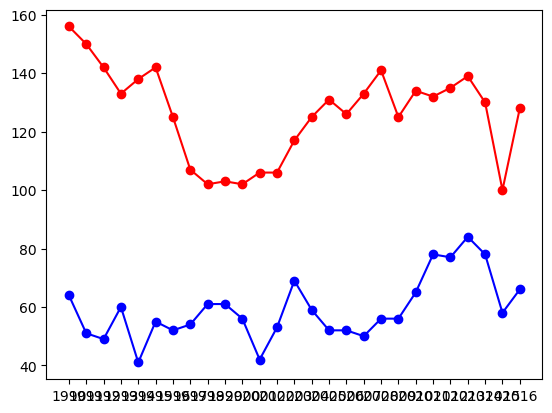

In [74]:
plt.plot(waterDF.loc['남한'],'bo-', waterDF.loc['북한'], 'ro-')
plt.show()